## Milestone 1

### Introduction
A problem that I often run into when browsing online retailers for any number of items is that the recommended or similar items often feel like they wander a little too far away from the original item to be of interest. This is especially true with creative work like movies, video games, or books, where often the recommendations will provide only a broad genre or creator connection.  One significant windfall that these types of products provide is that they tend to have a significant presence of reviews and personally opinions posted on relative web sites.  Movies and TV shows have user reviews posted on Rotten Tomatoes, and even web sites like Metacritic congregate the reviews of many mediums of entertainment.  

I want to create a model that can utilize the user review information for media like this to provide more informed recommendations when looking for similar content.  Ideally this will be extendable to cover a variety of types of media and recommend content across all of them.  In an effort to create this system in a scalable manner, I chose one to test out the viability of in this project.  Of the available options I chose to move forward with a database of reviews and information on tabletop board games.  The entry that I will be using from Kaggle.net will provide a rather sizable sample of user reviews for these games that I can use to train and test the model.  Additionally, the dataset provides a significant number of potential features that can be used to help predict a game’s favorability.  In addition to analyzing user sentiment towards different games, we can utilize user specific ratings to determine a correlation between games and the users that enjoy them.

### Dataset
https://www.kaggle.com/datasets/jvanelteren/boardgamegeek-reviews

### EDA

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ast import literal_eval

This first section mostly entails removing unnessecary data to make manipulation of the data sets a little more managable.  One big performance booster was to remove the review data that did not contain a comment as that is a significant factor in our reccomendation model.

In [ ]:
reviews_df = pd.read_csv("bgg-19m-reviews.csv")
reviews_df.sample(10)

,Unnamed: 0,user,rating,comment,ID,name
6920196,6920196,travvller,7.5,NaN,63888,Innovation
17033931,17033931,bigfomlof,7.0,NaN,140612,The Hobbit: An Unexpected Journey
2031125,2031125,dmartin1982,7.0,This feels like the youthful progeny of Diplom...,103343,A Game of Thrones: The Board Game (Second Edit...
13014733,13014733,alfonzo54,8.0,"Preliminary rating after two plays, one of whi...",132018,Churchill
9286630,9286630,DaVince,6.0,NaN,7805,Fearsome Floors
2037910,2037910,tryp09,7.0,Avg. Game Weight: 1.5 Bought in June 09,50,Lost Cities
8240054,8240054,pieces09,7.5,NaN,271324,It's a Wonderful World
16422794,16422794,grasa_total,5.0,"Less about how fast you can slap cards, and mo...",207338,Dungeon Rush
12935101,12935101,Wautd,8.8,Despite the relatively simple rules it has sur...,202583,Rise of Tribes
11091403,11091403,ninjadorg,5.0,NaN,158900,Samurai Spirit


In [ ]:
reviews_df = reviews_df.dropna(subset=['comment'])
reviews_df = reviews_df.drop(axis=1, columns="Unnamed: 0")
reviews_df.shape

(3368619, 5)

In [ ]:
reviews_df.describe()

,rating,ID
count,3.368619e+06,3.368619e+06
mean,6.905662e+00,9.135394e+04
std,1.785285e+00,9.121462e+04
min,1.401300e-45,1.000000e+00
25%,6.000000e+00,7.349000e+03
50%,7.000000e+00,5.086200e+04
75%,8.000000e+00,1.663840e+05
max,1.000000e+01,3.509920e+05


In [ ]:
board_games_df = pd.read_csv("games_detailed_info.csv")
board_games_df = board_games_df.drop(axis=1, columns="Unnamed: 0")
board_games_df.sample(10)

C:\Users\Gabe\AppData\Local\Temp\ipykernel_29284\2960143567.py:1: DtypeWarning: Columns (29,48) have mixed types. Specify dtype option on import or set low_memory=False.
  board_games_df = pd.read_csv("games_detailed_info.csv")


,type,id,thumbnail,image,primary,alternate,description,yearpublished,minplayers,maxplayers,...,War Game Rank,Customizable Rank,Children's Game Rank,RPG Item Rank,Accessory Rank,Video Game Rank,Amiga Rank,Commodore 64 Rank,Arcade Rank,Atari ST Rank
11574,boardgame,1397,https://cf.geekdo-images.com/1NP9btvXfyXiUbBmL...,https://cf.geekdo-images.com/1NP9btvXfyXiUbBmL...,Crash Pilot,"['Bunt Herum', 'Check Out!', 'Checkout!', 'Gei...",Crash Pilot rewards players who can quickly ma...,1999,2,5,...,NaN,NaN,477.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20161,boardgame,13262,https://cf.geekdo-images.com/iR1qq692CX2ycX0Bh...,https://cf.geekdo-images.com/iR1qq692CX2ycX0Bh...,Spider & Fly,"[""L'Araignée Volante"", 'La araña y la mosca', ...",The players have to bring their two &quot;flie...,1977,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7908,boardgame,191998,https://cf.geekdo-images.com/8gswngFky6wybNtac...,https://cf.geekdo-images.com/8gswngFky6wybNtac...,Lost Legacy: Fourth Chronicle – The Werewolf &...,NaN,"In the distant past, a starship from a faraway...",2016,2,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15291,boardgame,337503,https://cf.geekdo-images.com/uHzsISiIiOC7JZ_TU...,https://cf.geekdo-images.com/uHzsISiIiOC7JZ_TU...,Cardiceo,NaN,Players are dealt 5-10 cards with values 1-15....,2016,2,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17991,boardgame,139894,https://cf.geekdo-images.com/HUpS22IR9iEJTDC4U...,https://cf.geekdo-images.com/HUpS22IR9iEJTDC4U...,Alchemist Academy,NaN,In Alchemist Academy you play a young and gift...,2013,2,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2084,boardgame,111,https://cf.geekdo-images.com/XZOfL2SO5sF1gSu4F...,https://cf.geekdo-images.com/XZOfL2SO5sF1gSu4F...,Rheinländer,NaN,"This Reiner Knizia game, produced by Hasbro's ...",1999,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6222,boardgame,1633,https://cf.geekdo-images.com/djCSJO1HlFqwguQvC...,https://cf.geekdo-images.com/djCSJO1HlFqwguQvC...,Spies!,NaN,Spies is a game of espionage and intrigue for ...,1981,2,5,...,1175.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18395,boardgame,274053,https://cf.geekdo-images.com/Glhgk4KesX76qgkhr...,https://cf.geekdo-images.com/Glhgk4KesX76qgkhr...,Vintage Racers,NaN,"In Vintage Racers, you will take on the role o...",2019,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13674,boardgame,197069,https://cf.geekdo-images.com/sZLSd_g7S6z7aMdRu...,https://cf.geekdo-images.com/sZLSd_g7S6z7aMdRu...,Traitor Mechanic: The Traitor Mechanic Game,NaN,In Traitor Mechanic: The Traitor Mechanic Game...,2016,4,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19259,boardgame,170980,https://cf.geekdo-images.com/c5qhfhf30fPV8C-Ka...,https://cf.geekdo-images.com/c5qhfhf30fPV8C-Ka...,Elven Castle,['Эльфийский Замок'],At the beginning of the &#208;&#173;&#208;&#18...,2013,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
board_games_df.describe()

,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,usersrated,average,...,Thematic Rank,War Game Rank,Customizable Rank,RPG Item Rank,Accessory Rank,Video Game Rank,Amiga Rank,Commodore 64 Rank,Arcade Rank,Atari ST Rank
count,21631.000000,21631.000000,21631.000000,21631.000000,21631.000000,21631.000000,21631.000000,21631.000000,21631.000000,21631.000000,...,1235.000000,3501.000000,301.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,118133.093847,1986.094910,2.007027,5.709491,90.509177,63.647774,90.509177,9.611391,875.000693,6.417127,...,618.134413,1765.025421,151.405316,347.0,140.0,5374.0,227.0,180.0,170.0,140.0
std,105310.419253,210.042496,0.688957,15.102385,534.826511,447.213702,534.826511,3.640562,3697.681390,0.929178,...,356.859805,1025.206714,87.555326,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,1.041330,...,1.000000,1.000000,1.000000,347.0,140.0,5374.0,227.0,180.0,170.0,140.0
25%,12280.500000,2001.000000,2.000000,4.000000,25.000000,20.000000,25.000000,8.000000,57.000000,5.832710,...,309.500000,876.000000,76.000000,347.0,140.0,5374.0,227.0,180.0,170.0,140.0
50%,105187.000000,2011.000000,2.000000,4.000000,45.000000,30.000000,45.000000,10.000000,124.000000,6.446360,...,618.000000,1758.000000,151.000000,347.0,140.0,5374.0,227.0,180.0,170.0,140.0
75%,207013.000000,2017.000000,2.000000,6.000000,90.000000,60.000000,90.000000,12.000000,397.000000,7.039515,...,926.500000,2652.000000,227.000000,347.0,140.0,5374.0,227.0,180.0,170.0,140.0
max,350992.000000,2023.000000,10.000000,999.000000,60000.000000,60000.000000,60000.000000,25.000000,109006.000000,9.568290,...,1236.000000,3546.000000,303.000000,347.0,140.0,5374.0,227.0,180.0,170.0,140.0


In [ ]:
board_games_df = board_games_df.drop(columns=[ 'thumbnail', 'boardgameexpansion', 'boardgameimplementation', 'bayesaverage','Strategy Game Rank', 'Family Game Rank', 'stddev', 'median', 'numweights',
       'averageweight', 'boardgameintegration', 'boardgamecompilation',
       'Party Game Rank', 'Abstract Game Rank', 'Thematic Rank',
       'War Game Rank', 'Customizable Rank', "Children's Game Rank",
       'RPG Item Rank', 'Accessory Rank', 'Video Game Rank', 'Amiga Rank',
       'Commodore 64 Rank', 'Arcade Rank', 'Atari ST Rank', 'suggested_num_players', 'image'])

In [ ]:
board_games_df.isna().sum()

type                                 0
id                                   0
primary                              0
alternate                        12781
description                          1
yearpublished                        0
minplayers                           0
maxplayers                           0
suggested_playerage                111
suggested_language_dependence       72
playingtime                          0
minplaytime                          0
maxplaytime                          0
minage                               0
boardgamecategory                  283
boardgamemechanic                 1590
boardgamefamily                   3761
boardgamedesigner                  596
boardgameartist                   5907
boardgamepublisher                   1
usersrated                           0
average                              0
Board Game Rank                      0
owned                                0
trading                              0
wanting                  

In [ ]:
corr_matrix = board_games_df.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,usersrated,average,owned,trading,wanting,wishing,numcomments
id,1.000000,0.103923,-0.136860,0.016726,-0.029830,-0.052566,-0.029830,0.100057,-0.018260,0.400195,0.003438,-0.081131,0.068131,0.096976,-0.064944
yearpublished,0.103923,1.000000,-0.008847,-0.003830,0.008524,0.004769,0.008524,0.093028,0.008392,0.079102,0.013377,0.026470,0.035227,0.029205,0.002539
minplayers,-0.136860,-0.008847,1.000000,0.079731,0.016071,0.043760,0.016071,0.036387,-0.012549,-0.176669,-0.022870,0.000562,-0.091653,-0.082098,-0.013883
maxplayers,0.016726,-0.003830,0.079731,1.000000,-0.008161,-0.006525,-0.008161,0.008734,-0.002417,-0.041245,-0.001850,-0.009672,-0.018798,-0.011776,-0.006067
playingtime,-0.029830,0.008524,0.016071,-0.008161,1.000000,0.856547,1.000000,0.042785,-0.004395,0.093456,-0.002677,-0.005495,0.018374,0.009943,0.000296
minplaytime,-0.052566,0.004769,0.043760,-0.006525,0.856547,1.000000,0.856547,0.035942,-0.004539,0.040522,-0.004014,-0.002616,0.008411,0.001927,-0.000692
maxplaytime,-0.029830,0.008524,0.016071,-0.008161,1.000000,0.856547,1.000000,0.042785,-0.004395,0.093456,-0.002677,-0.005495,0.018374,0.009943,0.000296
minage,0.100057,0.093028,0.036387,0.008734,0.042785,0.035942,0.042785,1.000000,0.071819,0.191268,0.080627,0.127114,0.148398,0.133330,0.084022
usersrated,-0.018260,0.008392,-0.012549,-0.002417,-0.004395,-0.004539,-0.004395,0.071819,1.000000,0.169681,0.985525,0.809494,0.709240,0.812863,0.973480
average,0.400195,0.079102,-0.176669,-0.041245,0.093456,0.040522,0.093456,0.191268,0.169681,1.000000,0.178058,0.126233,0.330753,0.288076,0.178329


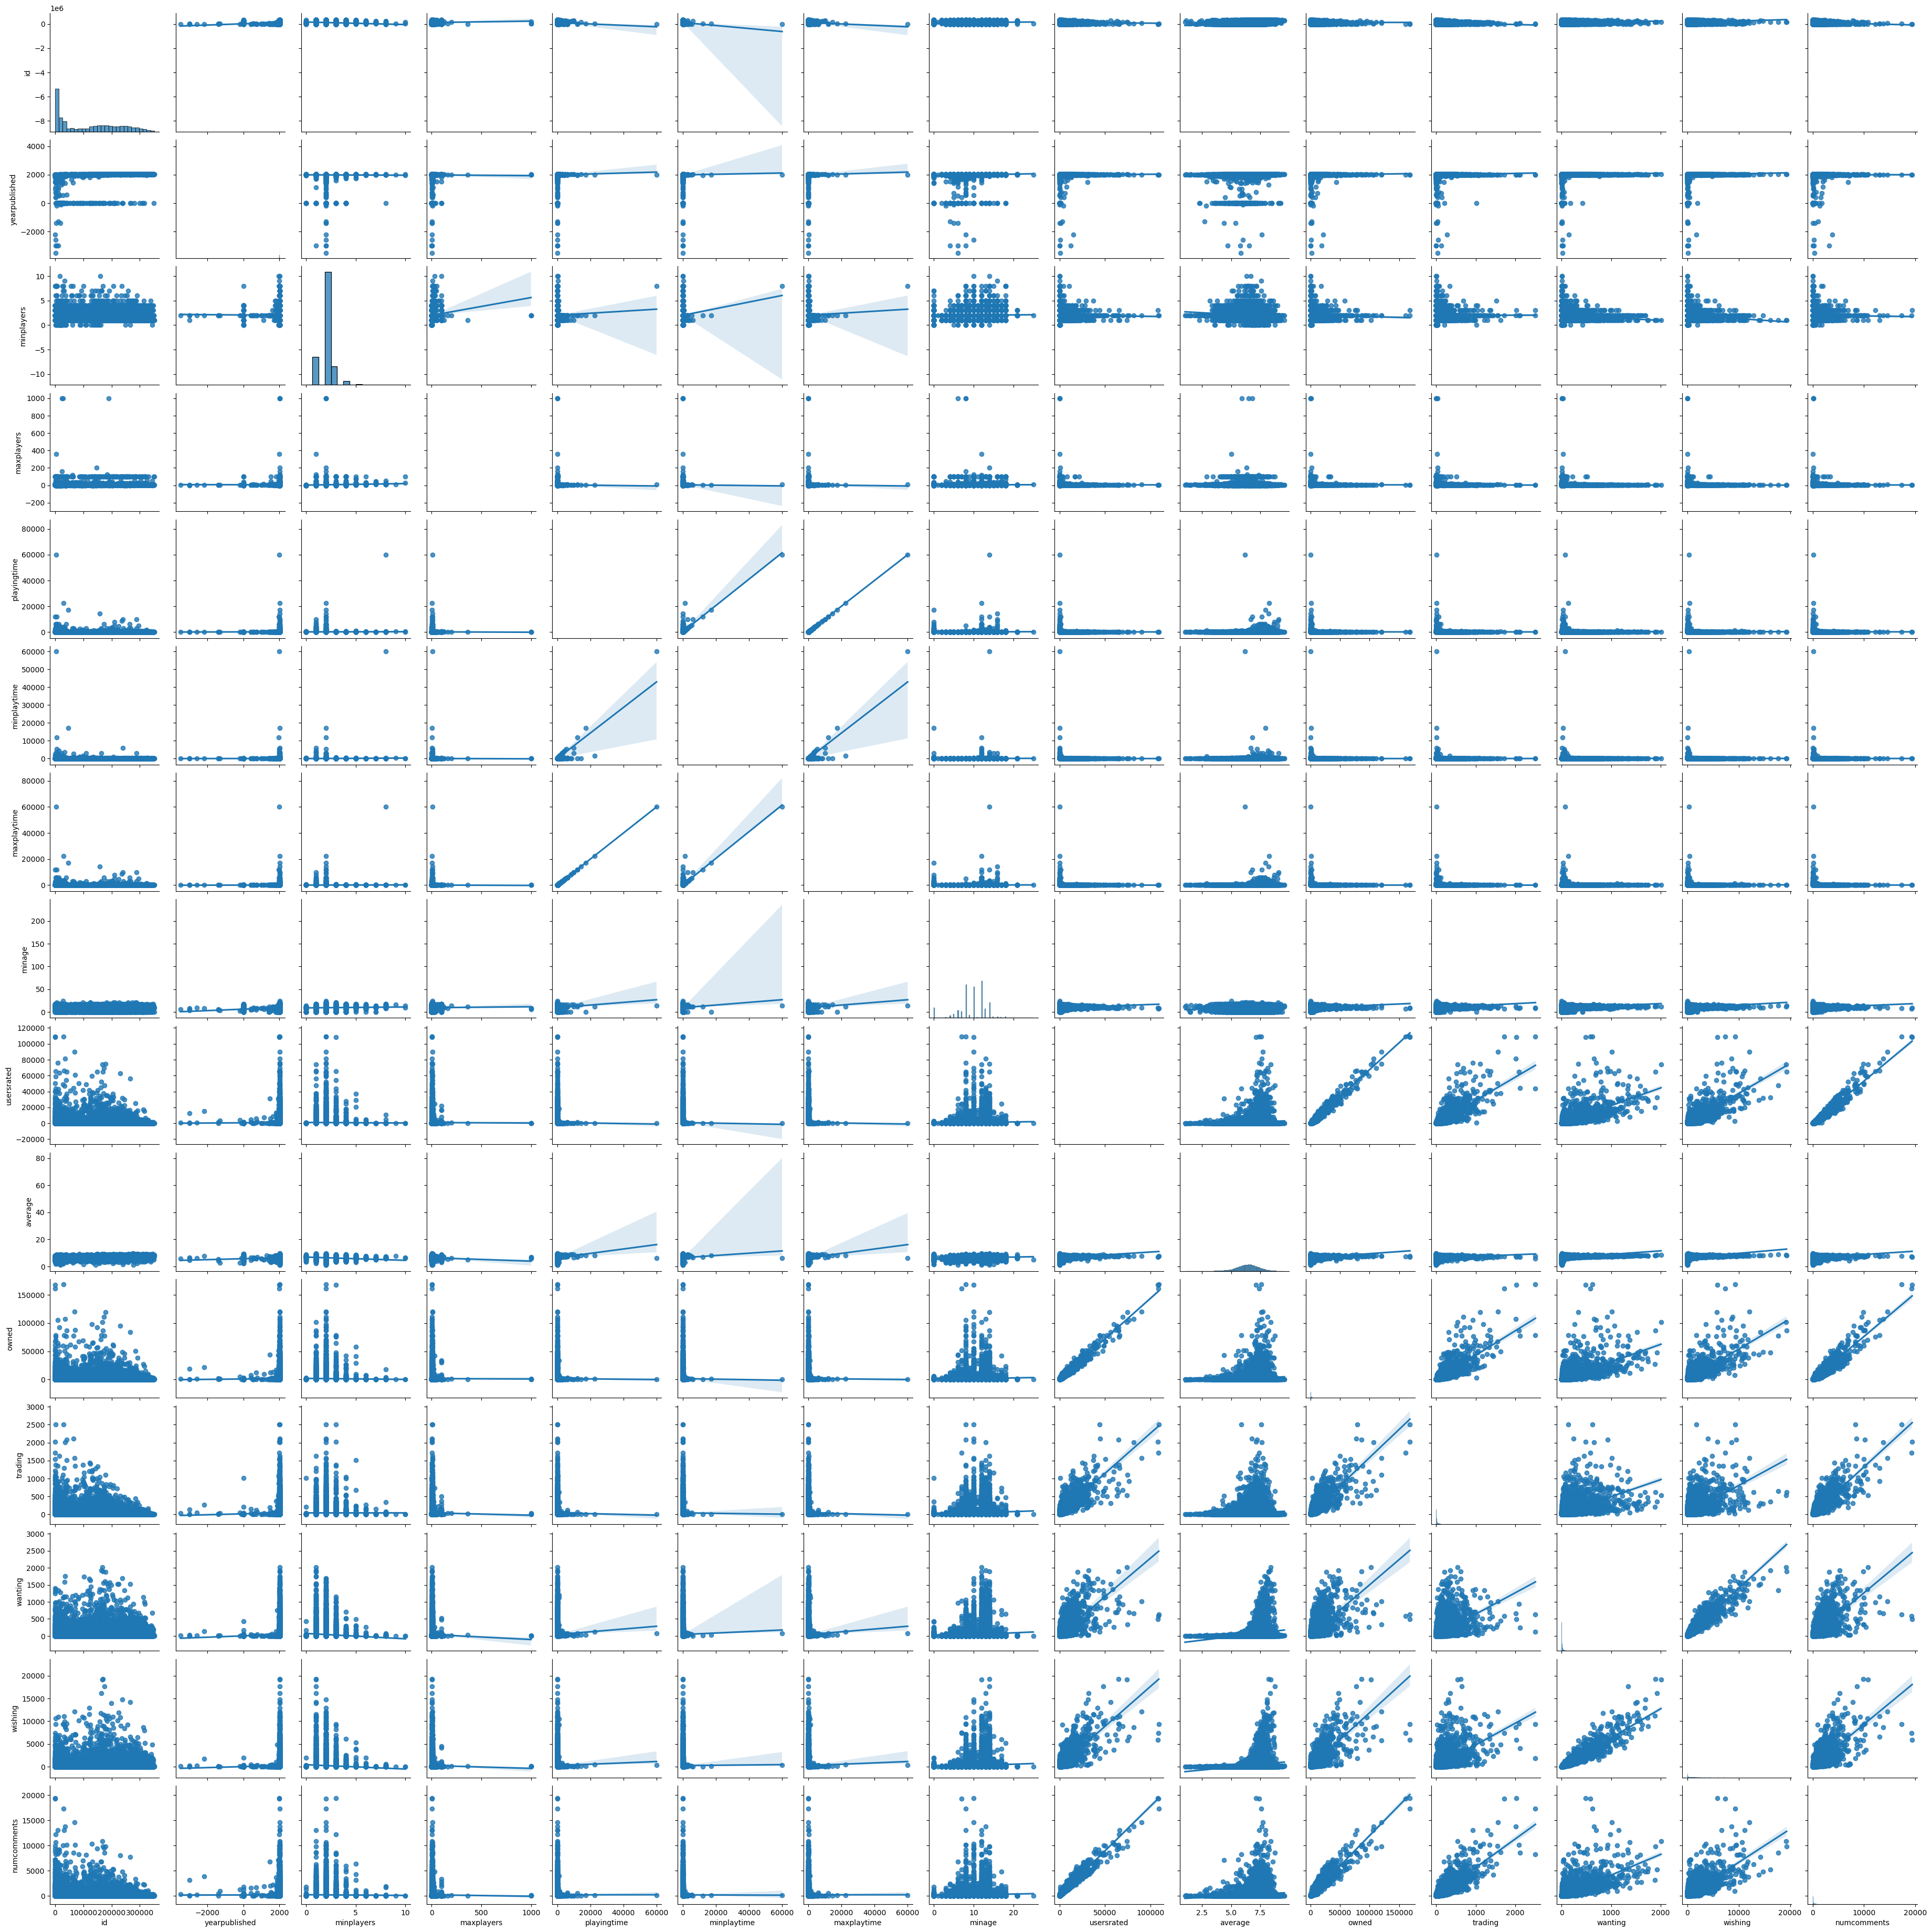

In [ ]:
sns.pairplot(board_games_df, kind="reg")
plt.show()

In an attempt to quickly find some correlation with the numerical data in this set, I threw together a few visualizations utilizint correlation matrices.

<AxesSubplot:xlabel='average', ylabel='Count'>

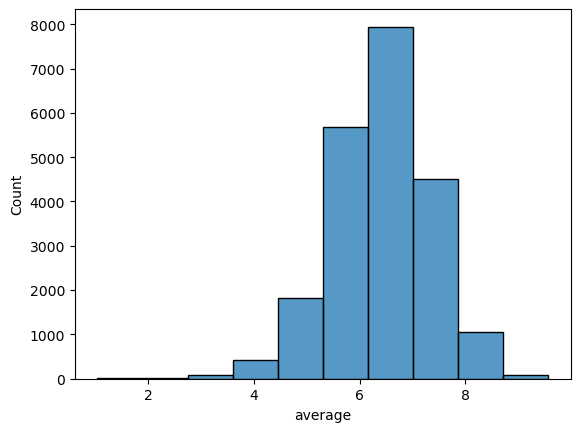

In [ ]:
sns.histplot(board_games_df.average, bins=10)

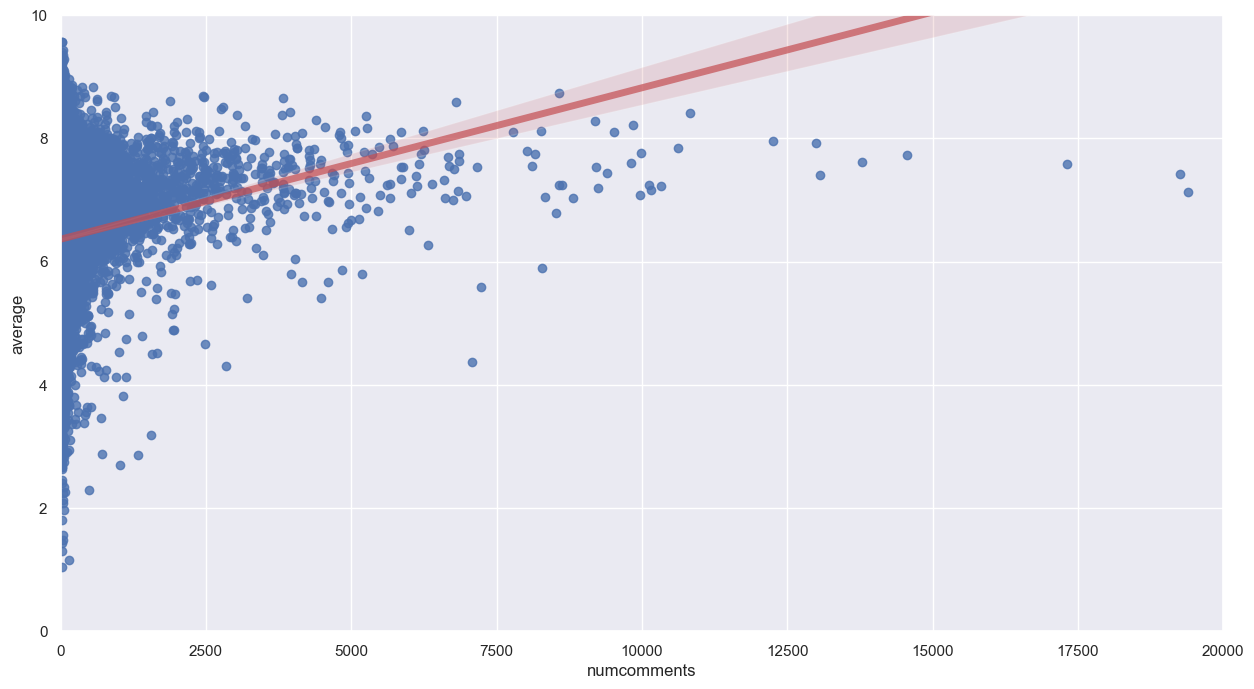

In [ ]:
sns.regplot(x=board_games_df.numcomments, y=board_games_df.average, line_kws={"color":"r","alpha":0.7,"lw":5})
sns.set(rc={'figure.figsize':(15,8)})
plt.ylim(0, 10)
plt.xlim(0, 20000)
plt.show()

This is a simple histogram of the average user rating to help detemermine where to best create a cutoff for mostly positive of mostly negative reviews.

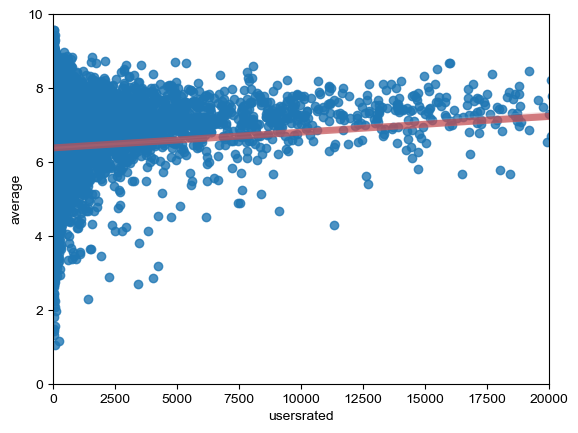

In [ ]:
sns.regplot(x=board_games_df.usersrated, y=board_games_df.average, line_kws={"color":"r","alpha":0.7,"lw":5})
sns.set(rc={'figure.figsize':(15,8)})
plt.ylim(0, 10)
plt.xlim(0, 20000)
plt.show()

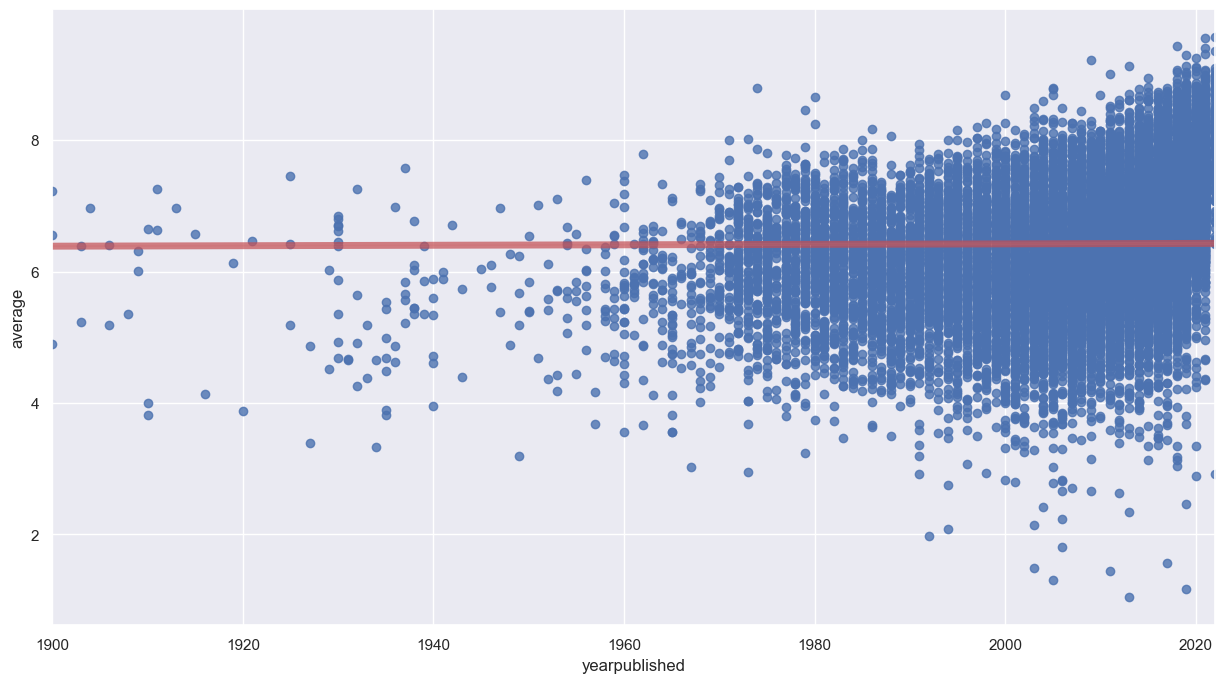

In [ ]:
sns.regplot(x=board_games_df.yearpublished, y=board_games_df.average, line_kws={"color":"r","alpha":0.7,"lw":5})
sns.set(rc={'figure.figsize':(15,8)})
plt.xlim(1900, 2022)
plt.show()

To get a better look at some of the relationships between each column in the dataset I went ahead and created scatterplots with regression lines to better examine the potential trends.

In [ ]:
board_games_df.boardgamecategory = board_games_df.boardgamecategory.dropna().apply(lambda x:  literal_eval(str(x)))
print(board_games_df.boardgamecategory.explode().value_counts())


Card Game                  6402
Wargame                    3820
Fantasy                    2681
Party Game                 1968
Dice                       1847
                           ... 
American Indian Wars         41
Game System                  29
Korean War                   26
Expansion for Base-game      24
Fan Expansion                 1
Name: boardgamecategory, Length: 84, dtype: int64


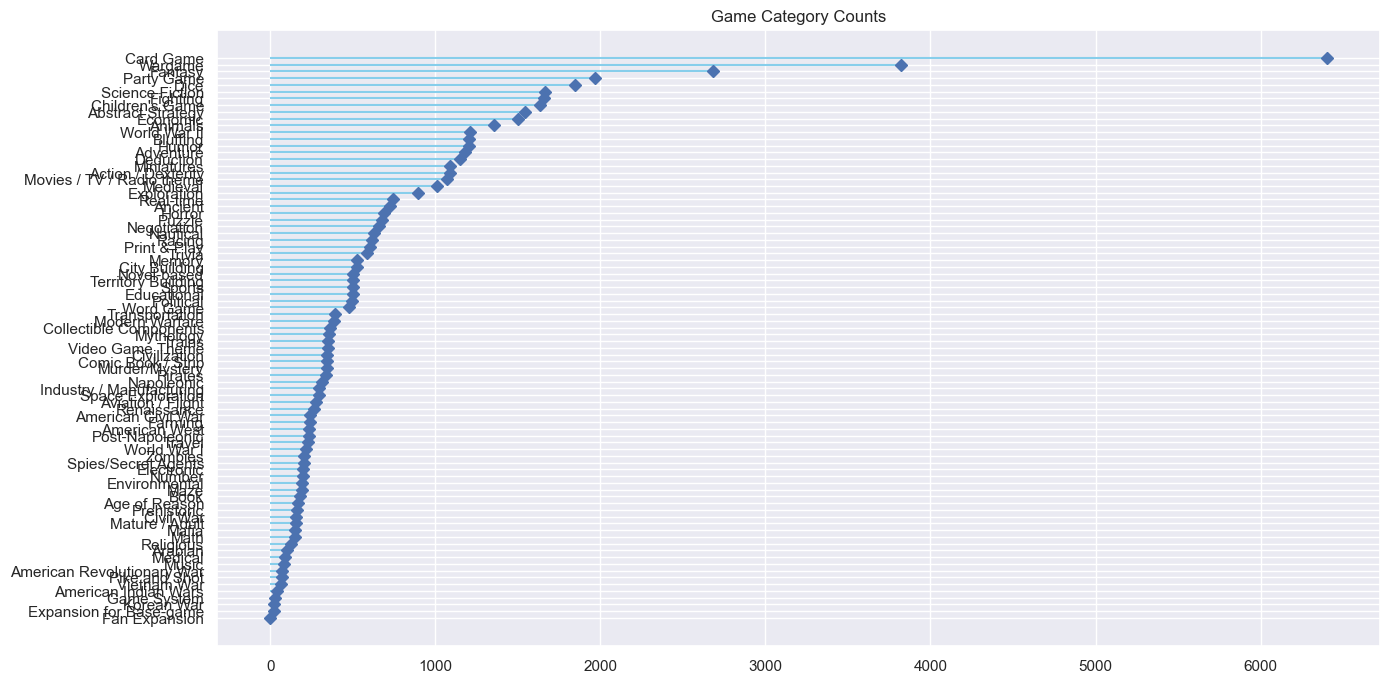

<Figure size 1800x2000 with 0 Axes>

In [ ]:
ordered_df = board_games_df.boardgamecategory.explode().value_counts().sort_values()
my_range=range(0,len(board_games_df.boardgamecategory.explode().value_counts()))

plt.hlines(y=my_range, xmin=0, xmax=ordered_df, color='skyblue')
plt.title("Game Category Counts")
plt.plot(ordered_df, my_range, "D")
plt.yticks(my_range, ordered_df.index)
plt.figure(figsize=(18, 20))
plt.show()

This visualization shows a proliferation of the cardgame and war game genres.  There are somewhat outliers in the categories of games and might need to be ignores to improve model accuracy.


### Conclusion
The main goal for my EDA was to determine if there were significant contributing factors that can help determine whether a game is reviewed positively or not.  I wasn’t able to find any significant correlation between average (the average user score) and any of the other elements.  This means that our model will rely heavily on the user sentiment from reviews and how we implement that when comparing games together.  Another goal of my EDA was to determine what rating would be considered positive and negative for the upcoming analysis.  We can use the mean of the average as the cutoff for positive reviews but will have to give less weight to games that contain fewer reviews.  They seem to have a much larger variance in user rating.

## Milestone 2

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

from scipy.sparse import csr_matrix


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gabe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gabe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Importing Reviews dataframe
reviews_df = pd.read_csv("bgg-19m-reviews.csv")
reviews_df.sample(10)


,Unnamed: 0,user,rating,comment,ID,name
12769989,12769989,CalgaryGuy76,7.0,NaN,271869,Sushi Roll
6931981,6931981,SkinnyGodfather,7.0,NaN,43443,Castle Panic
6144631,6144631,branvahn,7.0,NaN,164928,Orléans
8591869,8591869,yorkrambler,6.0,NaN,126042,Nations
11250447,11250447,dakkadakka1,9.0,NaN,197070,Massive Darkness
3379210,3379210,Snapcase,6.0,Nice components and a ton of factions mixed wi...,120677,Terra Mystica
16122289,16122289,Coffeedemon,8.0,NaN,154875,Silent Victory: U.S. Submarines in the Pacific...
1414665,1414665,lordvheod,7.0,NaN,157969,Sheriff of Nottingham
18271425,18271425,helt570,6.0,NaN,27291,AtmosFear: Khufu – The Mummy
2276803,2276803,CodGod,7.0,NaN,41114,The Resistance


In [ ]:
# dropping extra index column and rows without comments
reviews_df = reviews_df.dropna(subset=['comment'])
reviews_df = reviews_df.drop(axis=1, columns="Unnamed: 0")
# creating sentiment column based on mean scores found in EDA
reviews_df['sentiment'] = reviews_df.apply(lambda row: row.rating >= 6.4, axis = 1)
reviews_df.sample(10)

,user,rating,comment,ID,name,sentiment
13214171,_Marty_,8.50,"This is a great, yet complex, CCG. With innov...",1270,Star Wars Customizable Card Game,True
12288100,Ehop16,6.00,"Quick length, two player, decent filler game (...",247367,"Air, Land & Sea",False
12908801,heffernan,10.00,Yabba dabba doooo!!!!!,230,Merchant of Venus,True
6345628,EternalReaper,10.00,Great drafting element + components + art. Won...,209010,Mechs vs. Minions,True
1332501,Casual_Offender,8.00,"Pretty light, quick, and fun. The kind of game...",50,Lost Cities,True
16441224,NKOUK7,7.00,Too much luck driven I think. If you don't pic...,11081,Familienbande,True
2739306,GlennG,5.50,"Yeah, overrated. Does have a nice Magic Realm...",96848,Mage Knight Board Game,False
6963513,emspace,7.77,Every bit as card-draw-timing dependant as I h...,286096,Tapestry,True
3848599,skorasaurus,6.00,somewhat easy to learn; but just found myself ...,2651,Power Grid,False
18197399,Martin Ralya,5.00,"Like similar games I've played, this isn't so ...",9091,The Newlywed Game,False


In [ ]:
# filtering out comment elements and prepping for vectorization
cv_matrix = reviews_df.comment.str.lower()
cv_matrix = cv_matrix.apply(lambda x: re.sub('[^A-Za-z0-9]', ' ', x))
# removing stopwords and joining to apply Stemming
stop_words = stopwords.words('english')
cv_matrix = cv_matrix.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

# stemming words and joining again, last step before vectorizer
porter = PorterStemmer()
cv_matrix = cv_matrix.apply(word_tokenize)
cv_matrix = cv_matrix.apply(lambda x: [porter.stem(word) for word in x])
cv_matrix = cv_matrix.apply(lambda x: ' '.join([word for word in x]))

cv_matrix.head(10)

1     hand favorit new game bgg con 2007 play 5 time...
2     tend either love easili tire co op game pandem...
4     amaz co op game play mostli wife game realli i...
5     hey final rate game playtest coupl year realli...
8            love great fun son 2 play far look forward
9     fun fun game strategi requir definit access no...
11    know balanc thing absolut amaz ball find new w...
12               best collabor multi player game period
13    25 play play famili game 2 5 player final coop...
16    themat brisk game well balanc creat palpabl te...
Name: comment, dtype: object

In [ ]:
# Bag of words output is too large, limmited max features to 100000 and used int8
# will probably have to adjust this before implimenting the model.
vectorizer = CountVectorizer(max_features=10000)
reviews_vectored = vectorizer.fit_transform(cv_matrix).astype(np.uint8)
print(reviews_vectored.toarray().shape)

(3368619, 10000)


In [ ]:
board_games_df = pd.read_csv("games_detailed_info.csv")
board_games_df.sample(10)

C:\Users\Gabe\AppData\Local\Temp\ipykernel_16976\2692140945.py:1: DtypeWarning: Columns (29,48) have mixed types. Specify dtype option on import or set low_memory=False.
  board_games_df = pd.read_csv("games_detailed_info.csv")


,Unnamed: 0,type,id,thumbnail,image,primary,alternate,description,yearpublished,minplayers,...,War Game Rank,Customizable Rank,Children's Game Rank,RPG Item Rank,Accessory Rank,Video Game Rank,Amiga Rank,Commodore 64 Rank,Arcade Rank,Atari ST Rank
16906,16906,boardgame,9153,https://cf.geekdo-images.com/F4mozadd9ZmauNck0...,https://cf.geekdo-images.com/F4mozadd9ZmauNck0...,Monopoly: NASCAR,NaN,"The classic Property Trading Game, themed to N...",1997,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5739,5739,boardgame,233015,https://cf.geekdo-images.com/HUTKETQwa4XQH4keM...,https://cf.geekdo-images.com/HUTKETQwa4XQH4keM...,Imperius,NaN,The ruling house of the empire is in decline &...,2018,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,11,boardgame,148228,https://cf.geekdo-images.com/rwOMxx4q5yuElIvo-...,https://cf.geekdo-images.com/rwOMxx4q5yuElIvo-...,Splendor,"['Goharneshan (گوهرنشان)', 'Розкіш', 'Роскошь'...",Splendor is a game of chip-collecting and card...,2014,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20888,20888,boardgame,180916,https://cf.geekdo-images.com/5uTGw3JPMoRWI-ezg...,https://cf.geekdo-images.com/5uTGw3JPMoRWI-ezg...,Saving Time,NaN,Saving Time is a cooperative time travel game ...,2019,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11158,11158,boardgame,209926,https://cf.geekdo-images.com/-cl6uHD9mzsx6n2md...,https://cf.geekdo-images.com/-cl6uHD9mzsx6n2md...,Movable Type,NaN,Description from the publisher:&#10;&#10;Movab...,2016,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5480,5480,boardgame,27739,https://cf.geekdo-images.com/MZ_yCBTfXnbv1vRH3...,https://cf.geekdo-images.com/MZ_yCBTfXnbv1vRH3...,Hearts and Minds: Vietnam 1965-1975,NaN,Hearts and Minds: Vietnam 1965-1975 is a card-...,2010,2,...,251.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9645,9645,boardgame,308493,https://cf.geekdo-images.com/zE-9tRCxmYUMUxjhe...,https://cf.geekdo-images.com/zE-9tRCxmYUMUxjhe...,Relics of Rajavihara,NaN,You&rsquo;ve discovered an ancient palace fill...,2021,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,52,boardgame,37111,https://cf.geekdo-images.com/5Q2w2rFJiFI_uV89K...,https://cf.geekdo-images.com/5Q2w2rFJiFI_uV89K...,Battlestar Galactica: The Board Game,"['Battlestar Galactica: Das Brettspiel', 'Batt...",Battlestar Galactica: The Board Game is an exc...,2008,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16284,16284,boardgame,5279,https://cf.geekdo-images.com/Q5IP3AWsMcMwkPLCE...,https://cf.geekdo-images.com/Q5IP3AWsMcMwkPLCE...,Sagunto: The Battle for Valencia,NaN,The Battle of Sagunto is a game of tactical si...,1993,2,...,1580.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14199,14199,boardgame,274557,https://cf.geekdo-images.com/OeMXfFtJmZ5Qes8yE...,https://cf.geekdo-images.com/OeMXfFtJmZ5Qes8yE...,Match Up! Travel,"['Kapcsolj!: A Föld körül', 'Links Voyage', 'L...",Match Up! Travel &mdash; first released as Lin...,2018,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# dropping extra index column and comlumns that are outside of the scope of the model, such as summary statistics and alternate rankings.
board_games_df = board_games_df.drop(axis=1, columns="Unnamed: 0")
board_games_df = board_games_df.drop(columns=[ 'thumbnail', 'boardgameexpansion', 'boardgameimplementation', 'bayesaverage','Strategy Game Rank', 'Family Game Rank', 'stddev', 'median', 'numweights',
       'averageweight', 'boardgameintegration', 'boardgamecompilation',
       'Party Game Rank', 'Abstract Game Rank', 'Thematic Rank',
       'War Game Rank', 'Customizable Rank', "Children's Game Rank",
       'RPG Item Rank', 'Accessory Rank', 'Video Game Rank', 'Amiga Rank',
       'Commodore 64 Rank', 'Arcade Rank', 'Atari ST Rank', 'suggested_num_players', 'image'])
board_games_df.columns

Index(['type', 'id', 'primary', 'alternate', 'description', 'yearpublished',
       'minplayers', 'maxplayers', 'suggested_playerage',
       'suggested_language_dependence', 'playingtime', 'minplaytime',
       'maxplaytime', 'minage', 'boardgamecategory', 'boardgamemechanic',
       'boardgamefamily', 'boardgamedesigner', 'boardgameartist',
       'boardgamepublisher', 'usersrated', 'average', 'Board Game Rank',
       'owned', 'trading', 'wanting', 'wishing', 'numcomments'],
      dtype='object')

In [ ]:
stop_words = stopwords.words('english')
porter = PorterStemmer()

In [ ]:
# same process to vectorize descriptions as with comments
cv_matrix_desc = board_games_df.description.str.lower()
cv_matrix_desc = cv_matrix_desc.apply(lambda x: re.sub('[^A-Za-z0-9]', ' ', str(x)))


cv_matrix_desc = cv_matrix_desc.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

cv_matrix_desc = cv_matrix_desc.apply(word_tokenize)
cv_matrix_desc = cv_matrix_desc.apply(lambda x: [porter.stem(word) for word in x])
cv_matrix_desc = cv_matrix_desc.apply(lambda x: ' '.join([word for word in x]))

cv_matrix_desc.head(10)

0    pandem sever virul diseas broken simultan worl...
1    carcassonn tile placement game player draw pla...
2    catan formerli settler catan player tri domin ...
3    leader one 7 great citi ancient world gather r...
4    quot monarch like parent ruler small pleasant ...
5    elegantli simpl gameplay ticket ride learn 15 ...
6    codenam easi parti game solv puzzl 10 game div...
7    2400 mankind begin terraform planet mar giant ...
8    mani way 7 wonder duel resembl parent game 7 w...
9    descript boardgamenew 10 10 agricola farmer wo...
Name: description, dtype: object

In [ ]:
vectorizer = CountVectorizer()
descriptions_vectored = vectorizer.fit_transform(cv_matrix_desc)
print(descriptions_vectored.toarray().shape)

(21631, 51250)


In [ ]:
board_games_df

,type,id,primary,alternate,description,yearpublished,minplayers,maxplayers,suggested_playerage,suggested_language_dependence,...,boardgameartist,boardgamepublisher,usersrated,average,Board Game Rank,owned,trading,wanting,wishing,numcomments
0,boardgame,30549,Pandemic,"['EPIZOotic', 'Pandemia', 'Pandemia 10 Anivers...","In Pandemic, several virulent diseases have br...",2008,2,4,"[OrderedDict([('@value', '2'), ('@numvotes', '...","[OrderedDict([('@level', '6'), ('@value', 'No ...",...,"['Josh Cappel', 'Christian Hanisch', 'Régis Mo...","['Z-Man Games', 'Albi', 'Asmodee', 'Asmodee It...",109006,7.58896,106,168364,2508,625,9344,17305
1,boardgame,822,Carcassonne,"['Carcassonne Jubilee Edition', 'Carcassonne: ...",Carcassonne is a tile-placement game in which ...,2000,2,5,"[OrderedDict([('@value', '2'), ('@numvotes', '...","[OrderedDict([('@level', '81'), ('@value', 'No...",...,"['Doris Matthäus', 'Anne Pätzke', 'Chris Quill...","['Hans im Glück', '999 Games', 'Albi', 'Bard C...",108776,7.41837,191,161299,1716,582,7383,19263
2,boardgame,13,Catan,"['CATAN', 'Catan (Колонизаторы)', 'Catan telep...","In CATAN (formerly The Settlers of Catan), pla...",1995,3,4,"[OrderedDict([('@value', '2'), ('@numvotes', '...","[OrderedDict([('@level', '86'), ('@value', 'No...",...,"['Volkan Baga', 'Tanja Donner', 'Pete Fenlon',...","['KOSMOS', '999 Games', 'Albi', 'Asmodee', 'As...",108064,7.13598,429,167733,2018,485,5890,19402
3,boardgame,68448,7 Wonders,"['7 csoda', '7 Cudów Świata', '7 divů světa', ...",You are the leader of one of the 7 great citie...,2010,2,7,"[OrderedDict([('@value', '2'), ('@numvotes', '...","[OrderedDict([('@level', '6'), ('@value', 'No ...",...,"['Dimitri Chappuis', 'Miguel Coimbra', 'Etienn...","['Repos Production', 'ADC Blackfire Entertainm...",90021,7.73515,73,120466,1567,1010,12105,14553
4,boardgame,36218,Dominion,"['Dominion: Basisspiel', 'Dominion: In naam va...","&quot;You are a monarch, like your parents bef...",2008,2,4,"[OrderedDict([('@value', '2'), ('@numvotes', '...","[OrderedDict([('@level', '161'), ('@value', 'N...",...,"['Matthias Catrein', 'Julien Delval', 'Tomasz ...","['Rio Grande Games', '999 Games', 'Albi', 'Bar...",81582,7.61000,104,106956,2009,655,8621,13787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21626,boardgame,296892,Sacred Rites,NaN,It has come time to honor the traditions of th...,2020,3,9,"[OrderedDict([('@value', '2'), ('@numvotes', '...","[OrderedDict([('@level', '6'), ('@value', 'No ...",...,['Kristena Derrick'],['Story Machine Games'],30,7.36667,12750,112,8,4,32,14
21627,boardgame,217378,BABEL,NaN,BABEL is a balancing game in which players mak...,2016,1,5,"[OrderedDict([('@value', '2'), ('@numvotes', '...","[OrderedDict([('@level', '106'), ('@value', 'N...",...,['Masakazu Takizawa (たきざわ まさかず)'],"['こぐま工房 (Koguma Koubou)', 'Arclight']",30,6.61333,15017,64,1,6,21,10
21628,boardgame,18063,Goldrush,"['Arizona', 'Guldfeber', 'Kultakuume']",From the rules:&#10;&#10;Players are prospecto...,1970,2,4,"[OrderedDict([('@value', '2'), ('@numvotes', '...","[OrderedDict([('@level', '101'), ('@value', 'N...",...,NaN,"['Clipper', 'Condor', 'Joker', 'Pelikan']",30,5.00000,19461,98,7,4,5,13
21629,boardgame,10052,Bongo Kongo,NaN,Each player takes a position adjacent to one o...,1989,2,4,"[OrderedDict([('@value', '2'), ('@numvotes', '...","[OrderedDict([('@level', '56'), ('@value', 'No...",...,NaN,"['Ideal', 'Interplay (Board Game Related)', 'M...",30,5.80000,17262,52,4,8,13,15


In [ ]:
# creating dummy variables for board game categories
genre_df = board_games_df.filter(["id","primary", "boardgamecategory"], axis=1)
genre_df.boardgamecategory = genre_df.boardgamecategory.str.strip('[]').str.split('\s*,\s*')
genre_df_vectors = genre_df.boardgamecategory.explode().str.get_dummies().sum(level=0).add_prefix('category_')
genre_df_vectors

C:\Users\Gabe\AppData\Local\Temp\ipykernel_16976\398564488.py:4: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  genre_df_vectors = genre_df.boardgamecategory.explode().str.get_dummies().sum(level=0).add_prefix('category_')


,"category_""Children's Game""",category_'Abstract Strategy',category_'Action / Dexterity',category_'Adventure',category_'Age of Reason',category_'American Civil War',category_'American Indian Wars',category_'American Revolutionary War',category_'American West',category_'Ancient',...,category_'Transportation',category_'Travel',category_'Trivia',category_'Video Game Theme',category_'Vietnam War',category_'Wargame',category_'Word Game',category_'World War I',category_'World War II',category_'Zombies'
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21626,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21627,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21628,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
21629,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Milestone 3

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
from nltk.stem import WordNetLemmatizer
from sklearn.metrics.pairwise import cosine_similarity



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gabe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gabe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Gabe\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Gabe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Gabe\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
reviews_df = pd.read_csv("bgg-19m-reviews.csv")
# dropping extra index column and rows without comments
reviews_df = reviews_df.dropna(subset=['comment'])
reviews_df = reviews_df.drop(axis=1, columns="Unnamed: 0")
# creating sentiment column based on mean scores found in EDA
reviews_df.sample(10)

,user,rating,comment,ID,name
16636921,Superfage,6.50,A good mix of german and war game! Yuo need to...,870,Empires of the Ancient World
11102670,jollster725,6.70,Experience (35%) - 3/5 Mechanics (20%) - 4/5 I...,241724,Villagers
1815617,DancerInDC,8.75,What I like about this game is its simplicity ...,822,Carcassonne
17608509,jonny morbid,5.00,Another game based on ALIEN or--if you're a RE...,2613,Intruder
5654816,Jedi Mace,7.00,Very good Partygame. It's short and makes a lo...,147949,One Night Ultimate Werewolf
11944476,bwingrave,4.00,Negotiation game involving nasty card play. D...,115,I'm the Boss!
15259994,Kite Eating Tree,6.00,When this game came out I was addicted. It was...,798,Ace of Aces: Handy Rotary Series
16700825,jrigkvn1229,3.00,Extra! has much better risk reward,217547,Can't Stop Express
12744235,the_horror,8.00,Great introduction to the COIN series.,111799,Cuba Libre
17390180,David Ells,8.00,Kickstarter!,139572,Karesansui


In [ ]:
board_games_df = pd.read_csv("games_detailed_info.csv")
# dropping extra index column and comlumns that are outside of the scope of the model, such as summary statistics and alternate rankings.
board_games_df = board_games_df.drop(axis=1, columns="Unnamed: 0")
board_games_df = board_games_df.drop(columns=[ 'thumbnail', 'boardgameexpansion', 'boardgameimplementation', 'bayesaverage','Strategy Game Rank', 'Family Game Rank', 'stddev', 'median', 'numweights',
       'averageweight', 'boardgameintegration', 'boardgamecompilation',
       'Party Game Rank', 'Abstract Game Rank', 'Thematic Rank',
       'War Game Rank', 'Customizable Rank', "Children's Game Rank",
       'RPG Item Rank', 'Accessory Rank', 'Video Game Rank', 'Amiga Rank',
       'Commodore 64 Rank', 'Arcade Rank', 'Atari ST Rank', 'suggested_num_players', 'image'])
board_games_df.sample(10)

C:\Users\Gabe\AppData\Local\Temp\ipykernel_23780\3871456848.py:1: DtypeWarning: Columns (29,48) have mixed types. Specify dtype option on import or set low_memory=False.
  board_games_df = pd.read_csv("games_detailed_info.csv")


,type,id,primary,alternate,description,yearpublished,minplayers,maxplayers,suggested_playerage,suggested_language_dependence,...,boardgameartist,boardgamepublisher,usersrated,average,Board Game Rank,owned,trading,wanting,wishing,numcomments
8509,boardgame,62814,Tumblin-Dice Medium,NaN,A dexterity dice game consisting of four sets ...,2008,2,6,"[OrderedDict([('@value', '2'), ('@numvotes', '...","[OrderedDict([('@level', '6'), ('@value', 'No ...",...,NaN,['Ferti'],189,7.24975,5436,291,6,7,35,48
8824,boardgame,754,Domain,"['2001: The space age game', 'Boomerang', 'Cha...",Domain is a simple game played on a 9x9 square...,1982,2,2,"[OrderedDict([('@value', '2'), ('@numvotes', '...","[OrderedDict([('@level', '1'), ('@value', 'No ...",...,NaN,"['Alga', 'Editrice Giochi', 'Estrela', 'Nathan...",178,6.12156,10530,396,33,6,28,92
10827,boardgame,170909,Caçadores da Galáxia,NaN,"In a distant future, tiranic megacorporations ...",2015,2,4,"[OrderedDict([('@value', '2'), ('@numvotes', '...","[OrderedDict([('@level', '16'), ('@value', 'No...",...,"['Xia Taptara', 'Cássio Yoshiaki']","['HISTERIA GAMES', 'Taberna do Dragão']",124,7.68710,6709,214,10,2,25,19
12702,boardgame,708,Holy War: Afghanistan,NaN,&quot;Holy War: Afghanistan&quot; is a two-pla...,1991,2,2,"[OrderedDict([('@value', '2'), ('@numvotes', '...","[OrderedDict([('@level', '46'), ('@value', 'No...",...,['Mark Simonitch'],['Decision Games (I)'],91,6.23187,12020,495,26,12,29,74
17121,boardgame,170423,Comment j'ai adopté un gnou,['Cómo Adopté un Ñu'],The active player chooses a random theme by th...,2014,3,8,"[OrderedDict([('@value', '2'), ('@numvotes', '...","[OrderedDict([('@level', '6'), ('@value', 'No ...",...,['Fabien Bleuze'],"['Asmodee Spain', 'Le Droit de Perdre', 'LongA...",50,6.24080,14226,116,4,1,3,11
13146,boardgame,169045,Star Wars Galactic Dice Game,NaN,"In this Star Wars dice game, take your points ...",2014,2,8,"[OrderedDict([('@value', '2'), ('@numvotes', '...","[OrderedDict([('@level', '36'), ('@value', 'No...",...,NaN,['Cardinal'],85,5.28706,19271,301,4,0,10,30
19356,boardgame,253564,Marvel Dice Masters: X-Men Forever Campaign Box,NaN,The Marvel Dice Masters: X-Men Forever Campaig...,2019,2,2,"[OrderedDict([('@value', '2'), ('@numvotes', '...","[OrderedDict([('@level', '71'), ('@value', 'No...",...,NaN,['WizKids'],38,7.51061,11367,146,1,18,33,7
10869,boardgame,2002,Magical Maze,"[""Goblin's Gold"", ""Mag'nus et la pièce d'or"", ...","With the aid of the Wizard, you'll try to get ...",1994,2,4,"[OrderedDict([('@value', '2'), ('@numvotes', '...","[OrderedDict([('@level', '11'), ('@value', 'No...",...,NaN,"['Jumbo', 'Nathan', 'University Games']",123,5.31390,20021,262,14,5,7,54
18624,boardgame,160406,Khrysos Hunters,NaN,Mysterious treasures have been found in the Kh...,2014,2,4,"[OrderedDict([('@value', '2'), ('@numvotes', '...","[OrderedDict([('@level', '1'), ('@value', 'No ...",...,['Josh Rivers'],['The Flux Capacity'],42,5.61429,18326,135,8,0,6,19
17768,boardgame,6665,Legend of Camelot,NaN,From the back of the box:&#10;&quot;Relive the...,1987,2,4,"[OrderedDict([('@value', '2'), ('@numvotes', '...","[OrderedDict([('@level', '51'), ('@value', 'No...",...,NaN,['Hoyle Products'],46,5.70217,17140,124,12,6,19,26


### Recomendations based on user review scores using kNN

In [ ]:
# going to be using thesee to create the user review matrix dimensions
n_ratings = len(reviews_df)
n_games = len(reviews_df['ID'].unique())
n_users = len(reviews_df['user'].unique())
print(n_ratings, n_games, n_users)

3368619 21828 162324


In [ ]:
#maps idices to users and game IDs

user_map = dict(zip(np.unique(reviews_df["user"]), list(range(n_users))))
game_map = dict(zip(np.unique(reviews_df["ID"]), list(range(n_games))))
print(len(user_map) == n_users)
print(len(game_map) == n_games)

user_i_map = dict(zip(list(range(n_users)), np.unique(reviews_df["user"])))
game_i_map = dict(zip(list(range(n_games)), np.unique(reviews_df["ID"])))

True
True


In [ ]:
# creating indices for csr_matrix
user_index = [user_map[i] for i in reviews_df['user']]
game_index = [game_map[i] for i in reviews_df['ID']]



In [ ]:
# creates csr matrix
matrix = csr_matrix((reviews_df["rating"], (game_index, user_index)), shape=(n_games, n_users))
matrix

<21828x162324 sparse matrix of type '<class 'numpy.float64'>'
	with 3368619 stored elements in Compressed Sparse Row format>

In [ ]:
def find_related_games(game_id, k):
    # going to store the IDs for nearest games
    neighbour_ids = []
    
    # Honestly kinda confused as to what's going on here. I think the vectors are the euclidean distances of the other games in relation to the movie_id
    game_index = game_map[game_id]
    game_vector = matrix[game_index]
    k+=1
    # knn model fits created matrix so the 
    kNN = NearestNeighbors(algorithm = 'brute', metric='cosine')
    kNN.fit(matrix)
    game_vec = game_vector.reshape(1,-1)
    # uses kneighborst to fin the 'k' most related games
    distances, indices = kNN.kneighbors(game_vec, n_neighbors=k)
    # adds returned list of games to neighbor_ids
    for i in range(0,len(distances.flatten())):
        n = indices.flatten()[i]
        neighbour_ids.append(game_i_map[n])
    neighbour_ids.pop(0)
    return neighbour_ids
  

In [ ]:
# creating a dictionary to pull the name of games from based on IDs
game_names = dict(zip(reviews_df['ID'], reviews_df['name']))

In [ ]:
game_id = 151247
  
recommended_games = find_related_games(game_id, k=10)
  
print(f"Games related to: {game_names[game_id]}")
for i in recommended_games:
    print(game_names[i])

Games related to: Greed
Deus
Copycat
Elysium
Kashgar: Merchants of the Silk Road
The Palaces of Carrara
Rise of Augustus
Spyrium
Bruges
Temporum
Prosperity


In [ ]:
game_id = 9209
  
recommended_games = find_related_games(game_id, k=10)
  
print(f"Games related to: {game_names[game_id]}")
for i in recommended_games:
    print(game_names[i])

Games related to: Ticket to Ride
Carcassonne
Catan
Pandemic
Lost Cities
Puerto Rico
Dominion
Power Grid
San Juan
Small World
Alhambra


In [ ]:
game_id = 28023
  
recommended_games = find_related_games(game_id, k=10)
  
print(f"Games related to: {game_names[game_id]}")
for i in recommended_games:
    print(game_names[i])
    

Games related to: Jamaica
King of Tokyo
For Sale
Stone Age
No Thanks!
Diamant
Tobago
Biblios
Kingsburg
Jaipur
Takenoko


### Using game descriptions

In [ ]:
# created a DF with IDs and game descriptions and set IDs as the index
game_desc_df = board_games_df[["id", "description"]]
print(type(game_desc_df))
game_desc_df.columns = ['ID', 'Description']
game_desc_df = game_desc_df.set_index('ID')



game_desc_df.sample(10)

<class 'pandas.core.frame.DataFrame'>


,Description
ID,
206448,"Welcome to Noxford, a timeless city in perpetu..."
316113,Buy the Vote is a 15 minute blind bidding game...
22614,This is a simple economic game about oil compa...
35035,Blood and Bridges is a complete stand-alone Wo...
104798,Game description from the publisher:&#10;&#10;...
4519,A version of the traditional game &quot;Yacht&...
191432,Town of Salem is a popular online game that go...
266938,Come along on the Smash Up World Tour!&#10;&#1...
312767,Astoria is a land pulsing with magic and intri...


In [ ]:
# variables to be used in the sentance processing
lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words('english'))
  
VERB_CODES = {'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'}

In [ ]:

def process_sentence(text):
    # changing to lower case, tokenizing, and lemmatizing each fo teh descriptions
    text = str(text).lower()
    temp_sent =[]
    words = nltk.word_tokenize(text)
    tags = nltk.pos_tag(words)
    for i, word in enumerate(words):
        if tags[i][1] in VERB_CODES: 
            lemmatized = lemmatizer.lemmatize(word, 'v')
        else:
            lemmatized = lemmatizer.lemmatize(word)
        if lemmatized not in stop_words and lemmatized.isalpha():
            temp_sent.append(lemmatized)
    # joining tokenized words and removing contractions
    finalsent = ' '.join(temp_sent)
    finalsent = finalsent.replace("n't", " not")
    finalsent = finalsent.replace("'m", " am")
    finalsent = finalsent.replace("'s", " is")
    finalsent = finalsent.replace("'re", " are")
    finalsent = finalsent.replace("'ll", " will")
    finalsent = finalsent.replace("'ve", " have")
    finalsent = finalsent.replace("'d", " would")
    return finalsent


In [ ]:
# cleaning each of the descriptions
game_desc_df['Processed_Description'] = game_desc_df.Description.apply(process_sentence)
game_desc_df.sample(10)

,Description,Processed_Description
ID,,
194505,"Tallinn (Reval, Castrum Danorum) in late 14th ...",tallinn reval castrum danorum late century try...
261355,Cortex 3 is another member of the Cortex famil...,cortex another member cortex family popular ga...
23346,The first cardgame from award winning designer...,first cardgame award win designer han van tol ...
73365,Get rid of your Payoo!&#10;&#10;There are no j...,get rid payoo jack queen king papayoo ndash un...
128011,Extra! Extra! is all about completing the fron...,extra extra complete front back page newspaper...
519,This dice-heavy racing game is set in the grea...,racing game set great white north alaska effic...
873,Briefly sold as at Essen 2000 as &quot;Online....,briefly sell essen quot quot tile laying game ...
28143,2018 UPDATE: The second edition of the game is...,update second edition game improve cvd color b...
108012,"April 14, 1912, 11:40 p.m.: In the dark, cold ...",april dark cold water atlantic ocean transatla...


In [ ]:
# saving to CSV just in case
game_desc_df.to_csv("game_desc_df.csv")

In [ ]:
# creating and applying TFIDF vectorizer to game descriptions and using cosine similarities to find the closest matches
tfidfvec = TfidfVectorizer()

tfidf_gamedesc = tfidfvec.fit_transform((game_desc_df['Processed_Description']))

cos_sim = cosine_similarity(tfidf_gamedesc, tfidf_gamedesc)

In [ ]:
# functions for retrieving similar game IDs from cos_sim
indices = pd.Series(game_desc_df.index)
  
def get_recommendations(id):
    recommended_games = []
    index = indices[indices == id].index[0]
    similarity_scores = pd.Series(cos_sim[index]).sort_values(ascending = False)
    top = list(similarity_scores.iloc[1:11].index)
    for i in top:
        recommended_games.append(list(game_desc_df.index)[i])
    return recommended_games

In [ ]:
game_id = 151247
  
recommended_games = get_recommendations(game_id)
  
print(f"Games related to: {game_names[game_id]}")
for i in recommended_games:
    print(game_names[i])

Games related to: Greed
Ohanami
Escalation!
Vantage
Zwickern
Mū
Pets
Naova
6 nimmt! 25 Jahre
Lao Pengh
The Bark Side


In [ ]:
game_id = 9209
  
recommended_games = get_recommendations(game_id)
  
print(f"Games related to: {game_names[game_id]}")
for i in recommended_games:
    print(game_names[i])

Games related to: Ticket to Ride
Ticket to Ride: First Journey (Europe)
Ticket to Ride: Europe
Ticket to Ride: First Journey (U.S.)
Ticket to Ride: The Card Game
Ticket to Ride: New York
Ticket to Ride: Rails & Sails
Ticket to Ride: London
Zug um Zug: Deutschland
Ticket to Ride: Amsterdam
Ticket to Ride: Germany


In [ ]:
game_id = 28023
  
recommended_games = get_recommendations(game_id)
  
print(f"Games related to: {game_names[game_id]}")
for i in recommended_games:
    print(game_names[i])

Games related to: Jamaica
Myths and Legends
Master Merchant
Emmerlaus Duel of Mages
James Clavell's Shogun Card Game
Fighting Fantasy Battle Cards
Monad
Jolly & Roger
Top Race
Monopoly: Klingon Edition
Bad Bunnies
